# Homework 10
Wesley Sandidge<br>
Friday, November 16th

<b>Exercise 1</b> <i>Project</i> [10 points]<br><br>
You should have started working on your project. Provide a detailed description (at least one
page) of the relevant physical and mathematical equations, and discuss why they are difficult
or impossible to treat analytically. Give references to the books or articles that you have been
using. This will be the basis for the “Theory” section of your poster.

<b>Exercise 2</b> <i>Planetary orbits</i> [10 points]<br><br>
The equations of motion for the position $x$, $y$ of a planet in its orbital plane are
<br><br>$$\frac{d^2x}{dt^2}= −GM \frac{x}{r^3}, \\   \frac{d^2y}{dt^2}= −GM \frac{y}{r^3},$$<br>
where $G = 6.6738×10^{-11} m^3 kg^{−1}s^{−2}$ is Newton’s gravitational constant, $M = 1.9891×10^{30} kg$
is the mass of the Sun, and $r =\sqrt{x^2 + y^2}$.
<br><br>
1. Transform this system of two second order ODEs into an equivalent system of four first order ODEs.
<br><br>
$$\frac{dx}{dt}= v_x(t), \ \ \frac{dy}{dt}= v_y(t),$$
$$\frac{dv_x}{dt}= −GM \frac{x}{r^3}, \ \ \frac{dv_y}{dt}= −GM \frac{y}{r^3},$$
<br><br>
2. The Earth’s orbit is not perfectly circular, but rather slightly elliptical. When it is at its closest approach to the Sun, its perihelion, it is moving precisely tangentially (i.e., perpendicular to the line between itself and the Sun) and it has distance $1.4710 × 10^{11}$ m from the Sun and linear velocity $3.0287×10^4 ms^{−1}$. Write a program to calculate the orbit of the Earth, using 4th order Runge-Kutta implemented explicitly. Make a plot of the orbit (i.e., a plot of y against x), showing at least two complete revolutions about the Sun.

Text(0.5,1,'Planet Orbit')

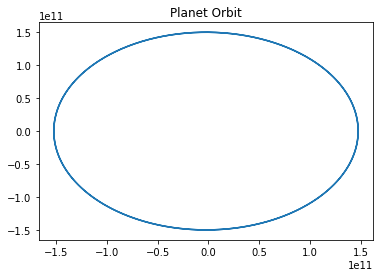

In [1]:
# 2. 

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.constants import G

def f(A,t):
    x = A[0]
    y = A[1]
    r = [x,y]
    vx = A[2]
    vy = A[3]
    dx = vx
    dy = vy
    dvx = -G*M*(x/(np.linalg.norm(r))**3)
    dvy = -G*M*(y/(np.linalg.norm(r))**3)
    return np.array([vx,vy,dvx,dvy],float)

# G = 6.6738e-11 # gravitational constant
M = 1.9891e30  # solar mass
x0 = 1.471e11  # orbital distance
y0 = 0  # orbital distance
vx0 = 0 # orbital velocity
vy0 = 3.0287e4 # orbital velocity

start = 0.0             # Initial time
end = 6.307e7           # Final time
numSteps = 1000         # Number of Runge-Kutta steps
stepSize = (end-start)/numSteps

tpoints = np.arange(start, end, stepSize)
xpoints = []
ypoints = []

# initial conditions for x and y
A = np.array([x0,y0,vx0,vy0],float)  

# all steps are as normal RK4, but vector valued quantities used
for t in tpoints:
    xpoints.append(A[0])
    ypoints.append(A[1])
    k1 = stepSize*f(A,t)        
    k2 = stepSize*f(A+0.5*k1,t+0.5*stepSize)   
    k3 = stepSize*f(A+0.5*k2,t+0.5*stepSize)
    k4 = stepSize*f(A+k3,t+stepSize)
    A += (k1+2.*k2+2.*k3+k4)/6

plt.plot(xpoints,ypoints)
plt.title('Planet Orbit')

3. Repeat the calculation above using one of the library routines, scipy.integrate.odeint or scipy.integrate.solve_ivp. Make sure that you choose a sufficiently high accuracy to see the periodic orbit.

Text(0.5,1,'Planet Orbit')

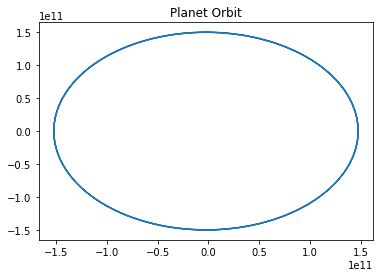

In [2]:
# 3.

def f_mod(t, A):
    return f(A,t)

sol = solve_ivp(f_mod,(start, end), A, method='RK45',rtol=1e-8)

plt.plot(sol.y[0],sol.y[1])
plt.title('Planet Orbit')

4. Modify either one of your programs to calculate the orbit of a comet in the solar system. Many comets travel in highly elongated orbits around the sun. For much of their lives they are far out in the solar system, moving very slowly, but on rare occasions their orbit brings them close to the Sun for a fly-by and for a brief period of time they move very fast. As an initial condition, take a comet 4 billion kilometers away from the Sun (which is somewhere out around the orbit of Neptune) with initial velocity $500 m s^{−1}$. Make a graph showing the trajectory of the comet.

Text(0.5,1,'Comet Orbit')

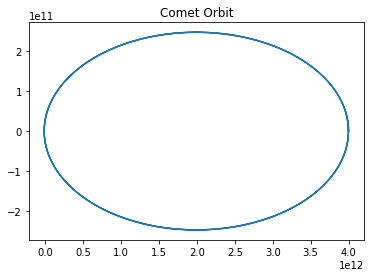

In [3]:
# 4.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.constants import G

def f(A,t):
    x = A[0]
    y = A[1]
    r = [x,y]
    vx = A[2]
    vy = A[3]
    dx = vx
    dy = vy
    dvx = -G*M*(x/(np.linalg.norm(r))**3)
    dvy = -G*M*(y/(np.linalg.norm(r))**3)
    return np.array([vx,vy,dvx,dvy],float)

# G = 6.6738e-11 # gravitational constant
M = 1.9891e30  # solar mass
x0 = 4e12  # orbital distance
y0 = 0  # orbital distance
vx0 = 0 # orbital velocity
vy0 = 500 # orbital velocity

start = 0.0             # Initial time
end = 50*6.307e7           # Final time
numSteps = 200000         # Number of Runge-Kutta steps
stepSize = (end-start)/numSteps

tpoints = np.arange(start, end, stepSize)
xpoints = []
ypoints = []

# initial conditions for x and y
A = np.array([x0,y0,vx0,vy0],float)  

# all steps are as normal RK4, but vector valued quantities used
for t in tpoints:
    xpoints.append(A[0])
    ypoints.append(A[1])
    k1 = stepSize*f(A,t)        
    k2 = stepSize*f(A+0.5*k1,t+0.5*stepSize)   
    k3 = stepSize*f(A+0.5*k2,t+0.5*stepSize)
    k4 = stepSize*f(A+k3,t+stepSize)
    A += (k1+2.*k2+2.*k3+k4)/6

plt.plot(xpoints,ypoints)
plt.title('Comet Orbit')

<b>Exercise 3</b> <i>Quantum Oscillators</i> [10 points]<br><br>

In the lab we studied the harmonic quantum oscillator: the one-dimensional, time-independent
Schrodinger equation with a harmonic potential. Modify your program from the lab to calculate
the same three energies (ground state and first two excited states) for the anharmonic oscillator with $V(x) = V_0x^4/a^4$, which cannot be solved analytically. The parameter values stay the same: $m$ is the electron mass, $V_0 = 50\ eV$, and $a = 10^{−11}\ m$.
<br><br>
Modify your program further to calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states and make a plot of them, all on the same axes, as a function of x over a modest range near the origin—say $x = −5a$ to $x = 5a$.<br><br>
To normalize the wavefunctions you will have to evaluate the integral $\int_{∞}^{−∞}|ψ(x)|^2dx$ and then rescale $ψ$ appropriately to ensure that the area under the square of each of the wavefunctions
is $1$. Either the trapezoidal rule or Simpson’s rule will give you a reasonable value
for the integral. Note, however, that you may find a few very large values at the end of the
array holding the wavefunction. These values are an artefact of the numerical calculation.
By definition the wavefunction should go to zero at the boundary. It does not in the calculation
because we have some numerical error in the energy estimate and the wavefunction is
extremely sensitive to the energy value. You can choose plot limits such that the large values
are not displayed.<br><br>
One simple way to deal with the large values is to make use of the fact that the system
is symmetric about its midpoint and calculate the integral of the wavefunction over only the
left-hand half of the system, then double the result. This neatly misses out the large values.

In [70]:
# import physical constants from SciPy
from scipy.constants import hbar, m_e, e
from scipy.integrate import simps
from numpy import sqrt, square

V0 = 50*e
a = 1e-11
X = 5 

L = 5.2917721e-11     # Bohr radius 

Y =[]

# numerical parameters
numSteps = 500
# stepSize = L/numSteps
stepSize = 2*X*a/numSteps

# Potential function => trivial in this example
# (but we can easily generalize the problem by replacing this by a complicated potential!)
def V(x):
    return V0*x**4/a**4

# Schroedinger equation
def f(r,x,E):
    psi = r[0]
    phi = r[1]    # this is what we will call the derivative of psi
    fpsi = phi    # we turned the second order equation into two first order equations, as usual
    fphi = (2*m_e/hbar**2)*(V(x)-E)*psi
    return np.array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy with RK4
def solve(E):
    global Y
    psi = 0.0
    phi = 1.0     # the initial condition for phi doesn't matter => only affects normalization
    r = np.array([psi,phi],float)
    Y=[]

    for x in np.arange(-X*a,X*a,stepSize):
        Y.append(r[0])
        k1 = stepSize*f(r,x,E)
        k2 = stepSize*f(r+0.5*k1,x+0.5*stepSize,E)
        k3 = stepSize*f(r+0.5*k2,x+0.5*stepSize,E)
        k4 = stepSize*f(r+k3,x+stepSize,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method ### boundary conditions
# Ground state
E11 = 0.0
E12 = e
# 1st excited
E21 = e
E22 = 700*e
# 2nd excited
E31 = 700*e
E32 = 1400*e

psi2 = solve(E11)
psi3 = solve(E21)
psi4 = solve(E31)

target = e/1000
while abs(E11-E12)>target:
    psi1, psi2 = psi2, solve(E12)
    E11, E12 = E12, E12-psi2*(E12-E11)/(psi2-psi1)

# Eground = E2

print("E ground=",E12/e,"eV")

wfGround=Y
# Y[450:500]=0

E ground= 205.30182762352732 eV


In [71]:
while abs(E21-E22)>target:
    psi1, psi3 = psi3, solve(E22)
    E21, E22 = E22, E22-psi3*(E22-E21)/(psi3-psi1)
    
# Efirst = E3    

print("E 1st excited=",E22/e,"eV")
wf1=Y

E 1st excited= 735.6730591781931 eV


In [72]:
while abs(E31-E32)>target:
    psi1, psi4 = psi4, solve(E32)
    E31, E32 = E32, E32-psi4*(E32-E31)/(psi4-psi1)

# Ethird = E4
    
print("E 2nd excited=",E32/e,"eV")
wf2=Y

E 2nd excited= 1443.533733115482 eV


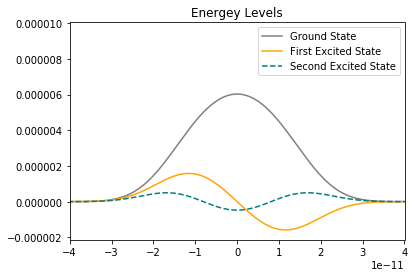

In [95]:
x1 = np.arange(-X*a,X*a,stepSize)

plt.plot(x1,wfGround, label='Ground State',color='grey')
plt.plot(x1,wf1, label='First Excited State',color='orange')
plt.plot(x1,wf2,'--', label='Second Excited State',color='teal')

plt.xlim(-4e-11,4e-11)
plt.title('Energey Levels')
plt.legend()

(-4e-11, 4e-11)

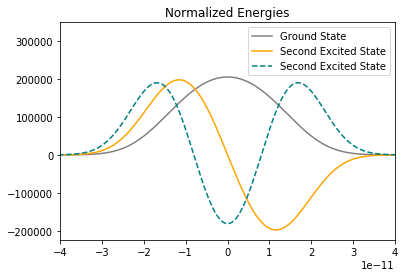

In [97]:
int1 = simps(square(wfGround),x1)
int2 = simps(square(wf1),x1)
int3 = simps(square(wf2),x1)

norm1 = wfGround/sqrt(int1)
norm2 = wf1/sqrt(int2)
norm3 = wf2/sqrt(int3)

plt.plot(x1,norm1, label='Ground State', color='grey')
plt.plot(x1,norm2, label='Second Excited State', color='orange')
plt.plot(x1,norm3, '--', label='Second Excited State', color='teal')
plt.title('Normalized Energies')
plt.legend()

plt.xlim(-4e-11,4e-11)